<a href="https://colab.research.google.com/github/vbgamer/Internship-Projects/blob/main/pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Lib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

LOADING DATASET

In [5]:
df= pd.read_csv('/content/amazon.csv')

READING DATASET

In [6]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
df.shape

(1465, 16)

In [8]:
popular_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
product_id,
B077Z65HSD,3
B09KLVMZ3B,3
B098NS6PVG,3
B083342NKJ,3
B082T6V3DT,3
B08Y1TFSP6,3
B09C6HXFC1,3
B08HDJ86NZ,3
B09CMP1SC8,3


PLOTING DATASET

<Axes: xlabel='product_id'>

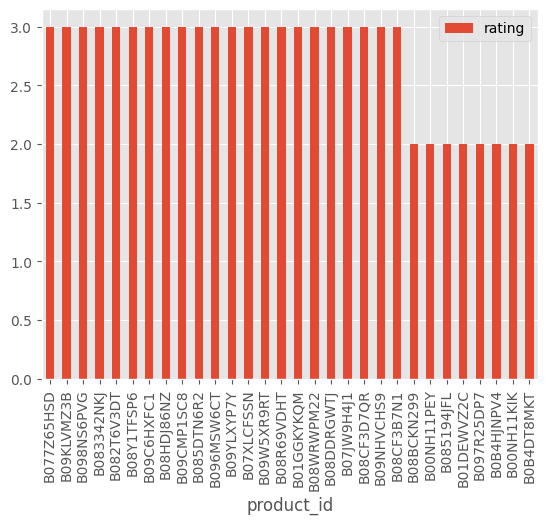

In [9]:
most_popular.head(30).plot(kind = "bar")

In [10]:
df1 = df.head(12000)

CLEANING AND TRANSFORMING DATA

In [11]:
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')
ratings_utility_matrix = df1.pivot_table(values='rating', index='user_name', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
user_name,,,,,,,,,,,,,,,,,,,,,
"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0.0
"& I Am IronMan,Amazon Customer,Sayandeep Sarkar,sherin",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0.0
"(sic),Harshit,Bharath N,Pulkit Malik,Akhtar Anwar,Amar Thapa,Chandan kumar,vijay",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0.0
"123MovieTime,Ravneet S.,Akash,Mohd Amaan,Pankaj,Sajan",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0.0
"9640185788,Piyush Mishra,Vickie,Sakshi gupta,Srinivas,Lovraj V.,Rakshitha,Sandeep Kumar Yadav",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0.0


In [12]:
ratings_utility_matrix.shape

(1193, 1350)

In [13]:
X = ratings_utility_matrix.T
X.head()

user_name,"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE","& I Am IronMan,Amazon Customer,Sayandeep Sarkar,sherin","(sic),Harshit,Bharath N,Pulkit Malik,Akhtar Anwar,Amar Thapa,Chandan kumar,vijay","123MovieTime,Ravneet S.,Akash,Mohd Amaan,Pankaj,Sajan","9640185788,Piyush Mishra,Vickie,Sakshi gupta,Srinivas,Lovraj V.,Rakshitha,Sandeep Kumar Yadav","9848023076,Parimala,ajay kumar verma,ARSHAD,Hola,Anil V,kuppannan maruthachalam,Nikhil","A H.,Amazon Customer,Amazon Customer,Gajendra Kumar sharma,Harpreet Kaur Sodhi,Shashi ranjan Kumar,Chandan Kumar,Vikas sharma","A K Rai,Poojitha Subrahmanyam Naralasetti,Mugiwara,Arasu,Suraj M.,Vasudeva,Praveen Ramachandruni,Bhaskar Choudhuri","A. Dubey,anandmohan,PREM,Daanish Daaivik,A,Amazon Customer,Jitendra padhi,Kritkalp","A.D.PAUL & CO.,Suraj,PRATEEK KUMAR RAI,Swarn Gupta,kalyan,Esther,Krishna chaithanya,NILIM",...,"virender malhotra,Vikas kabra,Das,Naveen,Amazon Customer,Adv. Manish kotwani,Vinod Jadhao,Priti tijare","vivek vinod,robin mohanty,Sadique a.,Harsh,rajat,Jay,Janardhanam,Hrishikesh","yash,Amazon Customer,Nagababu,Krunal Patel,Omi Mayekar,Irfan Hussain,Arif,harshit","yogita ratre,Arun k.,Amol Basutkar,janarthanan,Naman,keshav Chelmeti,Hritik jain,Jatin Shah","zain,Deepak,VIMAL,Shiv Sagar,Tamil selvan,Rakesh yadav,PAGOLA SURESH,Olivia","ˢᴰ82ˢᶜ ✔️,Manish Rautela,Sai kiran,Dinesh S,Uttam,Shahrukh,ADITYA UBARHANDE,Deepak Kanwaliya","अशोक वैष्णव,Satish,KBK,rajendra,BuyerOfProducts,Manjush Mohan,M.A.SAMAD KHAN,laxman pallikonda","⚡ Pushpendra Singh Patel ⚡,Mukul,Sauron,Amazon Customer,Bumble Bee,Naresh,Serena A Lyngdoh,Sohail Quazi","𝕵𝖆𝖙𝖎𝖓 𝕮𝖍𝖆𝖉𝖍𝖆,palpandia153,Arvind,Nithyadhakshina,Basha_Neerati,shaker,Amazon Customer,D Ravi","🤘🏻🤘🏻,Kabi,Manoj kumar ware,om,Hemant Kumar,pawan r.,Anshu,Pavan kamar"
product_id,,,,,,,,,,,,,,,,,,,,,
B002PD61Y4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002SZEOLG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003B00484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003L62T7W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B004IO5BMQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X.shape

(1350, 1193)

In [15]:
X1=X

HANDLING MISSING VALUES

In [16]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1350, 10)

In [17]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1350, 1350)

In [18]:
X.index[10]

'B0083T231O'

In [19]:
i = "B0083T231O"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

10

In [20]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1350,)

In [21]:
Recommend = list(X.index[correlation_product_ID > 0.70])
Recommend.remove(i)

Recommend[0:9]

['B004IO5BMQ',
 'B008LN8KDM',
 'B009P2LITG',
 'B009UORDX4',
 'B00EYW1U68',
 'B00HZIOGXW',
 'B00LVMTA2A',
 'B00N3XLDW0',
 'B00NM6MO26']

LIB FOR PRODUCT RECOMMEND

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [25]:
product = product.dropna()
product.shape
product.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [24]:
product = pd.read_csv('/content/amazon.csv')
product= product.dropna()
product1 = product.head(500)

VECTORIZATION

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product1["review_content"])

CLUSTERING

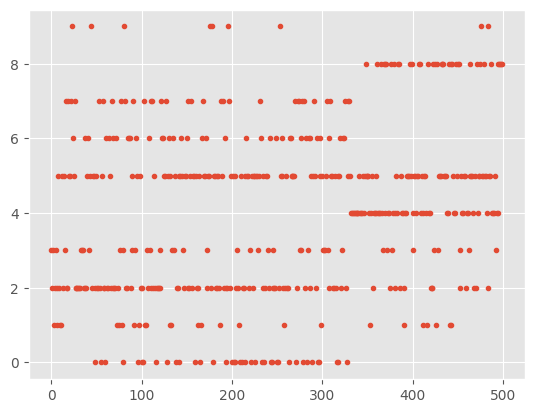

In [28]:

true_k = 10
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=42)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.plot(y_kmeans, ".")
plt.show()

In [42]:

def print_cluster(cluster_id):
    print(f"Cluster {cluster_id}:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for ind in order_centroids[cluster_id, :10]:
        print(f' {terms[ind]}')
    print()

print("Top terms per cluster:")
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 remote
 working
 original
 tv
 buttons
 good
 product
 works
 fine
 button

Cluster 1:
 product
 good
 cable
 warranty
 charging
 micro
 charger
 type
 wire
 charges

Cluster 2:
 cable
 charging
 good
 fast
 charger
 original
 product
 car
 quality
 charge

Cluster 3:
 images
 good
 _sy88
 jpg
 https
 com
 media
 charging
 cable
 amazon

Cluster 4:
 watch
 battery
 good
 phone
 features
 ui
 calling
 price
 faces
 screen

Cluster 5:
 good
 product
 quality
 cable
 nice
 price
 works
 working
 using
 money

Cluster 6:
 tv
 picture
 installation
 good
 sound
 remote
 quality
 service
 panel
 4k

Cluster 7:
 tv
 picture
 good
 quality
 sound
 product
 service
 lags
 range
 smart

Cluster 8:
 camera
 phone
 good
 battery
 quality
 display
 heating
 life
 usage
 bad

Cluster 9:
 charging
 iphone
 didn
 71qffalv9zl
 income
 depend
 group
 manner
 xr
 work



In [41]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = kmeans.predict(Y)
    print_cluster(prediction[0])

TAKING INPUT FROM USER

In [43]:
user_input = input("Enter a product description for recommendations: ")
show_recommendations(user_input)

Enter a product description for recommendations: tv
Cluster 6:
 tv
 picture
 installation
 good
 sound
 remote
 quality
 service
 panel
 4k

